### Intergrantes:  
- Alessandro Di Lauro
- Augusto Jardim
- Caio Horita
- Marcelo Machado
- Vagner Velho

In [1]:
# Importando pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mostrar todas colunas do dataframes 
pd.set_option('display.max_columns', None)
# Formatar para 2 casas decimais
pd.options.display.float_format = "{:,.3f}".format

### Problema 1
Vamos praticar gerar matrizes e fazer operações com as linhas e colunas:

(a) Crie uma matriz A com as dimensões (5, 4) e elementos aleatórios variando entre 0 e 50, com o 50 incluso;

__Dica:__ Utilize as funções `np.random.randint` e `np.reshape`

(b) Retorne a média do vetor

(c) Retorne os menores valores de cada coluna;

(d) Retorne os maiores valores de cada linha.

In [2]:
# A
# mat1 = np.random.randint(high=51, size=(5, 4))  --> tb aceita
mat1 = np.random.randint(low=0, high=51, size=(5, 4))
mat1

array([[20,  7,  3,  7],
       [ 1, 48, 44,  7],
       [47, 41, 15, 48],
       [24, 28, 11, 40],
       [23, 30, 10,  8]])

In [3]:
# B
mat1.mean()

23.1

In [4]:
# C
mat1.min(axis=0)

array([1, 7, 3, 7])

In [5]:
# D
mat1.max(axis=1)

array([20, 48, 48, 40, 30])

### Problema 2

Crie um objeto DataFrame que contenha os dados da tabela abaixo, os quais se referem ao peso, altura e idade de cinco pessoas:


| Peso (kg) | Altura (cm) | Idade (anos) |
|-----------|-------------|--------------|
|  47 | 161	| 31 |
|  80 | 170	| 21 |
|  60 | 175	| 16 |
|  90 | 162	| 28 |
| 100 | 185	| 23 |
| 147 | 189 | 32 |

Com base no DataFrame criado, realize o que for pedido nos itens abaixo:

(a) Visualize apenas os dados da coluna que contém a altura das pessoas;

(b) Obtenha a idade média das pessoas;

(c) Obtenha os dados das pessoas que estão abaixo da altura média;

(d) Crie um nova coluna no DataFrame que contenha o IMC (Índice de Massa Corporal) de cada pessoa;

__Obs.:__ A fórmula para o IMC é dada por IMC = Peso/(Altura)² com o peso em kg e a altura em metros.

(e) Remova a coluna que contém a idade das pessoas;

(f) Crie uma nova coluna chamada Classificação, que contenha a classificação de cada indivíduo, de acordo com o seu IMC. Para isso, consulte a tabela abaixo.

| IMC             | Classificação |
|-----------------|---------------|
Menor que 18,5    | Subpeso |
Entre 18,5 e 24,9 | Normal |
Entre 25,0 e 29,9 | Sobrepeso |
Entre 30,0 e 39,9 | Obesidade Grau I |
Maior que 40,0    | Obesidade Grau II |

(g) Salve esses dados do DataFrame em um arquivo csv.

In [6]:
df1 = pd.read_clipboard()
df1

EmptyDataError: No columns to parse from file

In [ ]:
df2 = df1.iloc[:, 0:3]
df2.columns = ['Peso (kg)', 'Altura (cm)', 'Idade (anos)']
df2

,Peso (kg),Altura (cm),Idade (anos)
0,47,161,31
1,80,170,21
2,60,175,16
3,90,162,28
4,100,185,23
5,147,189,32


In [ ]:
# A
df2['Altura (cm)']

0    161
1    170
2    175
3    162
4    185
5    189
Name: Altura (cm), dtype: int64

In [ ]:
# B
media_idade = df2['Idade (anos)'].mean()
media_idade

25.166666666666668

In [ ]:
# C
altura_media = df2['Altura (cm)'].mean()
abaixo_media = df2['Altura (cm)'] < altura_media
df2[abaixo_media]

,Peso (kg),Altura (cm),Idade (anos)
0,47,161,31
1,80,170,21
3,90,162,28


In [ ]:
# A fórmula para o IMC é dada por IMC = Peso/(Altura)² com o peso em kg e a altura em metros.

# D
df2['IMC'] = df2['Peso (kg)'] / (df2['Altura (cm)']/100)**2
df2

,Peso (kg),Altura (cm),Idade (anos),IMC
0,47,161,31,18.132
1,80,170,21,27.682
2,60,175,16,19.592
3,90,162,28,34.294
4,100,185,23,29.218
5,147,189,32,41.152


In [ ]:
# E
df3 = df2.drop('Idade (anos)', axis=1)
df3

,Peso (kg),Altura (cm),IMC
0,47,161,18.132
1,80,170,27.682
2,60,175,19.592
3,90,162,34.294
4,100,185,29.218
5,147,189,41.152


In [ ]:
# F

df3['Classificacao'] = pd.cut(x=df3['IMC'], bins=[0, 18.5, 24.9, 29.9, 39.9, 999], labels=['Subpeso', 'Normal', 'Sobrepeso', 'Obesidade Grau I', 'Obesidade Grau II'], right=True)
df3

,Peso (kg),Altura (cm),IMC,Classificacao
0,47,161,18.132,Subpeso
1,80,170,27.682,Sobrepeso
2,60,175,19.592,Normal
3,90,162,34.294,Obesidade Grau I
4,100,185,29.218,Sobrepeso
5,147,189,41.152,Obesidade Grau II


In [ ]:
# G
df3.to_csv('./prova_exercicio2.csv', sep=',', index=False)

### Problema 3

O arquivo avocado.xlsx consiste em um dataset que contém dados sobre vendas de abacates  em diversas regiões dos Estados Unidos. Essa dataset contém as seguintes colunas:

| Coluna | Descrição |
|--------|-----------|
| Date | data da observação |
| AveragePrice | preço médio de um único abacate |
| year | ano |
| region | cidade ou região da observação |
| Total Volume | volume total de abacates vendidos |

Além das informações acima, contidas no arquivo avocado.xlsx, o tipo do abacate (convencional ou orgânico) também seria uma informação importante para a sua análise. Suponhamos que você conseguiu essas informações para cada uma das observações do arquivo avocado.csv, na mesma ordem, e salvou-as no arquivo avocado_type.xlsx. Portanto, tudo o que você precisa é juntar esses dois arquivos em um mesmo DataFrame.

Com o DataFrame criado, obtenha o que é solicitado nos itens elencados abaixo:




In [10]:
df_avocado = pd.read_csv('./data/avocado.csv', sep=';')
df_avo_type = pd.read_excel('./data/avocado_type.xlsx')
df_avo_all = pd.concat([df_avocado, df_avo_type], axis=1)
df_avo_all.head()

,Date,AveragePrice,Total Volume,year,region,type
0,2015-12-27,1.330,"64,236.620",2015,Albany,orgânico
1,2015-12-20,1.350,"54,876.980",2015,Albany,convencional
2,2015-12-13,0.930,"118,220.220",2015,Albany,convencional
3,2015-12-06,1.080,"78,992.150",2015,Albany,orgânico
4,2015-11-29,1.280,"51,039.600",2015,Albany,orgânico


(a) A quantidade de abacates do tipo convecional e do tipo orgânico.

In [11]:
df_avo_all['type'].value_counts()

orgânico        9135
convencional    9114
Name: type, dtype: int64


(b) A quantidade de registros (linhas) de abacates vendidos para cada região ordenada da maior venda para a menor.

In [12]:
df_avo_all['region'].value_counts().sort_values(ascending=False)

Albany                 338
Denver                 338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Detroit                338
Sacramento             338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Nashville              338
NewOrleansMobile       338
NewYork                338
West                   338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
P

(c) Para que todos os labels das colunas fiquem padronizados, renomeie aqueles que estão iniciando em letra minúscula para que iniciem em letra maiúscula, trocando espaço por _ e adicionando _ como separação de texto.

In [13]:
df_avo_all.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'year', 'region', 'type'], dtype='object')

In [14]:
new_col = {'AveragePrice':'Average_Price', 'Total Volume':'Total_Volume', 'year':'Year', 'region':'Region', 'type':'Type'}

df_avo_all.rename(columns=new_col, inplace=True)
df_avo_all.head(2)

,Date,Average_Price,Total_Volume,Year,Region,Type
0,2015-12-27,1.330,"64,236.620",2015,Albany,orgânico
1,2015-12-20,1.350,"54,876.980",2015,Albany,convencional


(d) Essa dado possui duplicados? Se sim, remova-os do dataset.

In [15]:
df_avo_all.duplicated().sum()

0

(e) Retire dos dados a região 'TotalUS'

In [16]:
total_us = df_avo_all['Region'] != 'TotalUS'
(df_avo_all['Region'].unique() == 'TotalUS').sum()

1

In [17]:
df_avo_NoTotal = df_avo_all[total_us]
(df_avo_NoTotal['Region'].unique() == 'TotalUS').sum()

0

In [18]:
# outra forma
df_avo_NoTotal2 = df_avo_all.drop( df_avo_all[df_avo_all['Region']=='TotalUS'].index, axis=0)
(df_avo_NoTotal2['Region'].unique() == 'TotalUS').sum()

0

(g) Apresente as regiões que mais venderam abacate em todo o período em ordem decrescente.

In [19]:
# TOP10
df_avo_NoTotal.pivot_table(index='Region', values='Total_Volume', aggfunc=sum).sort_values(by='Total_Volume', ascending=False).head(10)

,Total_Volume
Region,
West,"1,086,779,155.750"
California,"1,028,981,653.170"
SouthCentral,"1,011,279,618.830"
Northeast,"713,280,909.560"
Southeast,"615,238,409.110"
GreatLakes,"589,642,549.290"
Midsouth,"508,349,357.200"
LosAngeles,"507,896,547.630"
Plains,"311,188,529.110"


(h) Calcule o volume total de abacates vendidos para cada tipo e ano.

In [20]:
df_avo_NoTotal.pivot_table(index='Year', columns='Type', values='Total_Volume', aggfunc=sum, margins=True)

Type,convencional,orgânico,All
Year,,,
2015,"1,405,835,526.600","1,322,377,914.020","2,728,213,440.620"
2016,"1,538,913,526.120","1,462,817,222.930","3,001,730,749.050"
2017,"1,505,463,914.140","1,564,148,221.750","3,069,612,135.890"
2018,"433,710,441.830","425,395,644.210","859,106,086.040"
All,"4,883,923,408.690","4,774,739,002.910","9,658,662,411.600"


(f) existe alguma região que foi a maior responsável pela queda na produção de 2018?

In [21]:
# Midsouth, Northeast, SouthCentral, Southeast, West

In [22]:
analise = df_avo_NoTotal.pivot_table(index='Region', columns='Year', values='Total_Volume', aggfunc=sum).reset_index()
analise['17_18_abs'] = analise[2018] - analise[2017]
analise['17_18_pct'] = (analise[2018] - analise[2017]) / analise[2017]

analise.head()

Year,Region,2015,2016,2017,2018,17_18_abs,17_18_pct
0,Albany,"4,029,896.430","5,264,335.590","5,231,581.780","1,541,986.170","-3,689,595.610",-0.705
1,Atlanta,"23,231,698.120","28,326,878.300","28,815,119.980","8,231,422.450","-20,583,697.530",-0.714
2,BaltimoreWashington,"40,645,579.540","40,893,802.320","41,015,634.460","12,158,903.000","-28,856,731.460",-0.704
3,Boise,"3,784,357.340","4,653,509.530","4,760,561.310","1,214,759.570","-3,545,801.740",-0.745
4,Boston,"27,454,991.640","30,571,315.070","30,610,672.160","8,637,005.960","-21,973,666.200",-0.718


In [23]:
analise_regiao = analise[ analise['Region'].isin(['Midsouth', 'Northeast', 'SouthCentral', 'Southeast', 'West']) ]
analise_regiao.sort_values(by='17_18_abs')

Year,Region,2015,2016,2017,2018,17_18_abs,17_18_pct
51,West,"304,670,319.630","344,577,335.010","345,054,416.100","92,477,085.010","-252,577,331.090",-0.732
45,SouthCentral,"290,454,593.990","304,098,699.590","325,422,615.770","91,303,709.480","-234,118,906.290",-0.719
29,Northeast,"203,378,985.680","218,931,085.830","224,647,301.210","66,323,536.840","-158,323,764.370",-0.705
46,Southeast,"160,095,209.060","198,121,477.650","196,737,251.860","60,284,470.540","-136,452,781.320",-0.694
25,Midsouth,"140,221,916.440","154,260,497.590","165,553,551.130","48,313,392.040","-117,240,159.090",-0.708


(g) Qual cidade menos faturou com a venda de abacates?

In [24]:
analise_cidade = analise[ ~analise['Region'].isin(['Midsouth', 'Northeast', 'SouthCentral', 'Southeast', 'West']) ]
analise_cidade.sort_values(by='17_18_abs').head(10)

Year,Region,2015,2016,2017,2018,17_18_abs,17_18_pct
6,California,"301,407,433.110","326,188,382.910","317,644,528.210","83,741,308.940","-233,903,219.270",-0.736
15,GreatLakes,"169,387,975.150","177,740,029.870","189,353,866.300","53,160,677.970","-136,193,188.330",-0.719
22,LosAngeles,"148,220,692.980","163,142,302.820","158,481,174.240","38,052,377.590","-120,428,796.650",-0.760
35,Plains,"87,638,790.730","95,241,634.010","100,280,031.410","28,028,072.960","-72,251,958.450",-0.721
28,NewYork,"70,607,635.910","71,546,563.140","74,850,673.310","23,729,255.170","-51,121,418.140",-0.683
18,Houston,"55,387,471.370","58,704,786.430","69,093,092.890","19,982,517.110","-49,110,575.780",-0.711
11,DallasFtWorth,"60,311,308.630","63,695,249.880","66,240,982.710","18,171,745.330","-48,069,237.380",-0.726
33,PhoenixTucson,"57,176,285.480","59,283,687.230","61,170,534.260","18,012,805.530","-43,157,728.730",-0.706
52,WestTexNewMexico,"41,523,998.110","43,807,431.600","47,389,589.290","11,800,820.780","-35,588,768.510",-0.751
12,Denver,"39,190,343.420","45,307,762.050","42,559,077.120","11,845,353.400","-30,713,723.720",-0.722


### Problema 4

Com base no dataset 'Video_Games_Sales.csv' responda:


In [25]:
df_game = pd.read_csv('./data/Video_Games_Sales.csv', sep=';')
df_game.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,"2,006.000",Sports,Nintendo,41.360,28.960,3.770,8.450,82.530,76.000,51.000,8.000,322.000,Nintendo,E
1,Super Mario Bros.,NES,"1,985.000",Platform,Nintendo,29.080,3.580,6.810,0.770,40.240,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.000",Racing,Nintendo,15.680,12.760,3.790,3.290,35.520,82.000,73.000,8.300,709.000,Nintendo,E
3,Wii Sports Resort,Wii,"2,009.000",Sports,Nintendo,15.610,10.930,3.280,2.950,32.770,80.000,73.000,8.000,192.000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.000",Role-Playing,Nintendo,11.270,8.890,10.220,1.000,31.370,NaN,NaN,NaN,NaN,NaN,NaN



(a) Quantos jogos existem em cada genero?


In [26]:
genero_jogo = df_game.pivot_table(index=['Genre', 'Name'], values='NA_Sales', aggfunc=sum).reset_index()

genero_jogo['Genre'].value_counts()

Action          1958
Sports          1379
Misc            1330
Role-Playing    1227
Adventure       1062
Shooter          825
Racing           772
Simulation       730
Fighting         613
Platform         588
Strategy         585
Puzzle           498
Name: Genre, dtype: int64

In [27]:
# outra forma de fazer
df_game.pivot_table(index='Genre', values='Name', aggfunc=pd.Series.nunique).sort_values(by='Name', ascending=False)

,Name
Genre,
Action,1958
Sports,1379
Misc,1330
Role-Playing,1227
Adventure,1062
Shooter,825
Racing,772
Simulation,730
Fighting,613


(b) Temos duplicados nesses dados? E nulos?

In [28]:
df_game.duplicated().sum()

0

In [29]:
# Linhas duplicadas = não
# porém temos vários nomes de jogos duplicados, devido data de publicação e plataforma diferentes

(b) Quantos jogos de cada publisher receberam nota acima de 9 na avaliação dos usuarios?

In [30]:
maior_9 = df_game['User_Score'] > 9
df_game_bom = df_game[maior_9]

df_game_bom.pivot_table(index='Publisher', values='Name', aggfunc=pd.Series.nunique).sort_values(by='Name', ascending=False)

,Name
Publisher,
Nintendo,20
Activision,16
Electronic Arts,16
Konami Digital Entertainment,10
Tecmo Koei,9
Capcom,9
THQ,9
Vivendi Games,8
Atari,7



(c) Faça uma tabela que mostre o total vendido por ano por pais/globalmente de cada publisher.  
Você consegue observar algum padrão? Com se comportaram as vendas na América do Norte (NA) ao longo do tempo? O mesmo foi visto nos demais lugares? 


<AxesSubplot:xlabel='Year_of_Release'>

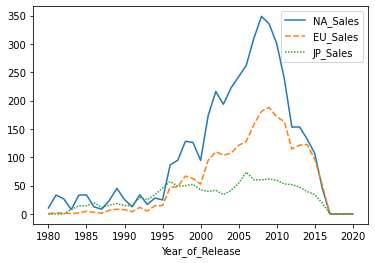

In [31]:
game_time = df_game.pivot_table(index='Year_of_Release', values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales'], aggfunc=sum)
sns.lineplot(data=game_time[['NA_Sales', 'EU_Sales', 'JP_Sales']])

In [32]:
df_game.pivot_table(index=['Publisher'], columns='Year_of_Release', values='Global_Sales', aggfunc=sum)

Year_of_Release,"1,980.000","1,981.000","1,982.000","1,983.000","1,984.000","1,985.000","1,986.000","1,987.000","1,988.000","1,989.000","1,990.000","1,991.000","1,992.000","1,993.000","1,994.000","1,995.000","1,996.000","1,997.000","1,998.000","1,999.000","2,000.000","2,001.000","2,002.000","2,003.000","2,004.000","2,005.000","2,006.000","2,007.000","2,008.000","2,009.000","2,010.000","2,011.000","2,012.000","2,013.000","2,014.000","2,015.000","2,016.000","2,017.000","2,020.000"
Publisher,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10TACLE Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020,0.090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1C Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010,NaN,0.090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20th Century Fox Video Games,NaN,1.350,0.590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2D Boy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400,4.140,3.080,1.450,0.600,0.450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
imageepoch Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040,NaN,NaN,NaN,NaN
inXile Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100,NaN,NaN,NaN



(d) Qual foi jogo mais vendido na união européia? De que ano ele é e qual a editora?


In [33]:
df_game.pivot_table(index='Name', values='EU_Sales', aggfunc=sum).sort_values(by='EU_Sales', ascending=False)

,EU_Sales
Name,
Wii Sports,28.960
Grand Theft Auto V,23.420
Mario Kart Wii,12.760
FIFA 15,12.020
Call of Duty: Modern Warfare 3,11.150
...,...
MLB Front Office Manager,0.000
MLB 2K9 Fantasy All-Stars,0.000
MLB 2K12 / NBA 2K12 Combo Pack,0.000


In [34]:
df_game[ df_game['Name']=='Wii Sports' ]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,"2,006.000",Sports,Nintendo,41.360,28.960,3.770,8.450,82.530,76.000,51.000,8.000,322.000,Nintendo,E



(e) Quantos % os generos ['Racing', 'Sports', 'Shooter'] representam na base de dados? 

In [37]:
total_global = df_game['Global_Sales'].sum()

racing_pct = df_game[ df_game['Genre']=='Racing' ]['Global_Sales'].sum() / total_global
sports_pct = df_game[ df_game['Genre']=='Sports' ]['Global_Sales'].sum() / total_global
shooter_pct = df_game[ df_game['Genre']=='Shooter' ]['Global_Sales'].sum() / total_global

print(f'Racing: {racing_pct:0.0%} \nSports: {sports_pct:0.0%} \n Shooter: {shooter_pct:0.0%}')

Racing: 8% 
Sports: 15% 
 Shooter: 12%


(f) Qual plataforma vendeu menos globalmente? obs: imprimir somente o nome

In [45]:
df_game.groupby('Platform')[['Global_Sales']].sum().sort_values(by='Global_Sales').tail(1).index[0]

'PS2'

### Problema 5
A pasta 'data/datasus' contém informações sobre casos de dengue e tabelas auxiliares. <br>

| Tabela | Conteúdo |
|--------|----------|
| Dengue | Quantidade de casos por município |
| Agua | Quantidade de residências em cada município por tipo o abastecimento de água |
| InstalacoesSanitarias | Quantidade de residências em cada município por tipo de rede de esgoto |
| Pib | PIB per capita de cada município |
| Municipios | Relaciona o id_municipio com seu nome e estado |
| Populacao | Quantidade de pessoas morando em áreas urbanas, rurais e população total por município |
| Sexo | Quantidade de pessoas por sexo em cada município |

(a) Calcular o número de casos de dengue por cada estado apresentando os dados em ordem decrescente.


In [46]:
import os
os.getcwd()
folder = './data/datasus/'
files = os.listdir(folder)
print(files)
df_agua = pd.read_csv(folder + files[0], delimiter = ',')
df_cid10 = pd.read_csv(folder + files[1], delimiter = ',')
df_den = pd.read_csv(folder + files[2], delimiter = ',')
df_inst_san = pd.read_csv(folder + files[3], delimiter = ',')
df_mun = pd.read_csv(folder + files[4], delimiter = ',')
df_pib = pd.read_csv(folder + files[5], delimiter = ',')
df_pop = pd.read_csv(folder + files[6], delimiter = ',')
df_sexo = pd.read_csv(folder + files[7], delimiter = ',')

['Agua.csv', 'Cid10.csv', 'Dengue.csv', 'InstalacoesSanitarias.csv', 'Municipios.csv', 'Pib.csv', 'Populacao.csv', 'Sexo.csv']


In [47]:
df_mun.merge(df_den, how = 'left', on = 'id_municipio')['UF'].value_counts().sort_values(ascending = False)

MG    853
SP    645
RS    497
BA    417
PR    399
SC    295
GO    246
PI    224
PB    223
MA    217
PE    185
CE    184
RN    167
PA    144
MT    141
TO    139
AL    102
RJ     92
MS     79
ES     78
SE     75
AM     62
RO     52
AC     22
AP     16
RR     15
DF      1
Name: UF, dtype: int64

(b) Utilizando o dataset InstalacoesSanitarias.csv, determine o número de pessoas que não possuem meio sanitário algum de descarte de dejetos por estado.

In [48]:
df_mun.merge(df_inst_san, how = 'left', on = 'id_municipio').groupby('UF')['nao_possui'].sum().sort_values(ascending = False)

UF
GO   5,814,249.000
BA   1,201,606.000
MA     946,217.000
PI     649,878.000
CE     645,246.000
PE     478,587.000
PA     306,028.000
MG     268,622.000
PB     217,920.000
AL     212,043.000
AM     211,491.000
TO     115,376.000
AC      73,437.000
RS      65,817.000
SE      62,352.000
RN      62,137.000
MT      52,961.000
PR      33,131.000
RR      29,705.000
SP      23,768.000
RO      22,181.000
RJ      16,987.000
SC      16,219.000
ES      13,060.000
AP      11,208.000
MS       9,010.000
DF           0.000
Name: nao_possui, dtype: float64

(c) Crie uma coluna com a posição de ranking considerando o PIB. Os maiores PIB devem ter os menores valores de ranking.

In [49]:
df_pib.sort_values(by = 'pib_percapta', ascending = False, inplace = True)
df_pib.reset_index(inplace = True)
df_pib['ranking_PIB'] = df_pib.index + 1
df_pib

,index,id_registro,id_municipio,pib_percapta,ranking_PIB
0,3152,3153,3155,"715,193.700",1
1,2962,2963,2965,"340,688.490",2
2,3574,3575,3577,"278,145.260",3
3,3230,3231,3233,"255,658.300",4
4,5163,5164,5169,"254,242.690",5
...,...,...,...,...,...
5554,617,618,618,"3,566.340",5555
5555,2106,2107,2109,"3,561.710",5556
5556,563,564,564,"3,529.100",5557
5557,643,644,644,"3,510.690",5558


(d) Qual o PIB dos 5 municípios com mais casos de dengue e sua posição no ranking?

In [50]:
df_pop.head()

,id_registro,id_municipio,urbana,rural,total
0,1,1,13806,"10,248.000",24054
1,2,2,3622,"9,136.000",12758
2,3,3,8185,"8,913.000",17098
3,4,4,8755,"7,922.000",16677
4,5,5,75906,"13,729.000",89635


In [51]:
df1 = df_mun.merge(df_pib, how = 'left', on = 'id_municipio')
df2 = df1.merge(df_den, how = 'left', on = 'id_municipio')
df3 = df2.merge(df_pop, how = 'left', on = 'id_municipio')
df3 = df3.loc[:,['id_municipio', 'municipio', 'casos', 'ranking_PIB','pib_percapta', 'total']]
df3['pib_municipio'] = df3['pib_percapta']*df3['total']
df3.sort_values(by = 'casos', ascending = False, inplace = True)
df3.head()

,id_municipio,municipio,casos,ranking_PIB,pib_percapta,total,pib_municipio
5565,5566,522200 Vianópolis,"239,395.000",905.000,"26,445.720","12,476.000","329,936,802.720"
5336,5337,520085 Americano do Brasil,"10,859.000","1,572.000","19,774.030","5,488.000","108,519,876.640"
5412,5413,520810 Formoso,"9,340.000",742.000,"29,034.210","4,848.000","140,757,850.080"
948,949,230435 Forquilha,"4,321.000","1,602.000","19,494.400","21,736.000","423,730,278.400"
5214,5215,510325 Colniza,"3,298.000",641.000,"31,016.190","25,913.000","803,722,531.470"
